# Tutorial 1: Data visualization

---

## Introduction

Welcome! This tutorial will show you how to visualise biochemical assay data from rooibos tea samples using Python. From this tutorial you will learn:

 - how to read data into python from an Excel file
 - how to use dataframes (pandas package)
 - how to visualise and compare biochemical properties of fermented and unfermented rooibos teas  using histograms
 - how to use Google to overcome programming challenges

Let's get started! First let's import the Python packages we'll need to load and visualize our data.

_Note_ that you will need to run all the cells in the notebook in order for it to work properly. The best way to do this is run them one by one.  Try to understand what each cell is doing when you run it. In some cells, you will have to write or modify code--just follow the instructions.  

---

First we import some libraries:

In [16]:
# ___Cell no. 1___

import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
from matplotlib.pyplot import show # This displays graphs once they have been created

The above statements define the prefixes 'pd' and 'sns' which will be used to identify  pandas and seaborn functions respectively in the following code.

<b><i> Reading in data </i></b>

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe

In [17]:
# ___Cell no. 2___

df_fer = pd.read_excel('orig.xlsx',  sheet_name='fer') # change the directory as needed
# df_fer ~ data frame with data from fermented rooibos samples

df_nf = pd.read_excel('orig.xlsx',  sheet_name='nonfer') # change the directory as needed
# df_nf ~ data frame with nonfermented rooibos samples

## Note that both fer/nf are from the same excel file "orig.xlsx", but on different sheets

<b><i> Examining data </i></b>

First let's take a look at the raw fermented and non-fermented data.

In [18]:
# ___Cell no. 3___
print(df_nf.head(5)) # shows the first 5 rows of the data frame (nonfermented data)


   type      F-MEOH      A1-MEOH      A2-MEOH   F-H2O   A1-H2O  A2-H2O cut
0     0  275.767474  2821.888864  1180.778887  314.33  2588.61  584.61  FC
1     0  253.494375  2355.706326   647.096605  331.41  2818.87  589.91  LL
2     0  255.307044  2182.134125   729.411993  269.64  2432.14  551.30  LL
3     0  275.360573  2469.683915   842.797272  210.76  1979.52  402.41  LL
4     0  303.070769  2546.362880   905.330599  199.87  1865.86  365.39  LL


---

**Exercise 1:** Show the first 5 rows of the data frame that has fermented data.
<br>
##### **hints**: All you need to do is copy the code from the previous cell and change the name of the data frame. Don't forget to run the cell after you've done this.


In [19]:
#  ___ code here ____
print(df_fer.head(5))

   type       F-H2O       A1-H2O       A2-H2O      F-MEOH      A1-MEOH  \
0     1  457.982012  3791.630281  1053.209972  257.631541  2063.016672   
1     1  339.713588  2825.660880   627.777353  266.472210  2103.093927   
2     1  348.809862  3363.905754   657.584108  251.443587  2052.680936   
3     1  221.543574  2000.789922   360.611685  250.451620  1963.529348   
4     1  347.776623  3024.878290   730.545849  240.960000  1950.643883   

      A2-MEOH cut  
0  829.673865  RS  
1  627.469976  RS  
2  892.081366  RS  
3  662.888570  RS  
4  548.189385  RS  


In both dataframes, the rows correspond to different tea samples, while the columns give the values of 8 variables, which can be explained as follows:
-  type -- categorical variable denoting one of two types of tea: nonfermented(0) or fermented(1)
- F-H2O -- continuous variable: F stands for phenolics and H2O stands for water extract. This column gives the phenolic content that was extracted using water as solvent.
- A1-H2O -- continuous variable: A1 represents "Trolox equivalent antioxidant capacity" (TEAC), which is a measurement of antioxidant activity. H2O is the solvent used for extraction.
- A2-H2O -- continuous variable: A2 represents "Ferric Reducing Antioxidant Power Assay" (FRAP), which is a different measurement of antioxidant activity. As before H2O is the solvent
- F-MEOH -- continuous variable: F stands for phenolics (as above), this time extracted using methanol (MEOH) as solvent instead of water
- A1-MEOH -- continuous variable: as above A1 represents TEAC with MEOH as solvent
- A2-MEOH -- continuous variable: A2 is for FRAP and MEOH is the solvent.
- cut -- catagorical variable, indicating the cut of the rooibos (not of interest in this study)

_Note_: Antioxidants have various health benefits (you may Google "antioxidant health benefits"). So the  antioxidant content of different tea varieties is of interest both to consumers and to rooibos producers. Phenolics are one particular type of antioxidant of special interest (you may Google "phenolics health benefits").

In this study, we use these different antioxidant measurements to attempt to identify whether a rooibos sample is fermented or nonfermented. This can help us better understand the relationship between fermentation and antioxidant content: for instance, does fermentation tend to increase or decrease antioxidant content?

Now let's verify the number of samples in each dataset. We do this using the 'shape' attribute for data frames:

In [20]:
# ___Cell no. 4___

# for nonfermented

nf_sh = df_nf.shape # "df_nf.shape" produces a tuple of 2 numbers
print("the shape of the nonfermented data is "+str(nf_sh) )

# The individual numbers in the tuple are accessed as follows:
print("where " + str(nf_sh[0]) +" is the number of rows, and")
print(str(nf_sh[1]) +" is the number of columns")

the shape of the nonfermented data is (47, 8)
where 47 is the number of rows, and
8 is the number of columns


---
**Exercise 2:** Please do the same for the fermented data
<br>
##### **hint**: Make sure to change `nf` to `fer` in all of the variable names


In [21]:
#  ___ code here ____
fer_sh = df_fer.shape # "df_nf.shape" produces a tuple of 2 numbers
print("the shape of the nonfermented data is "+str(nf_sh) )

# The individual numbers in the tuple are accessed as follows:
print("where " + str(fer_sh[0]) +" is the number of rows, and")
print(str(fer_sh[1]) +" is the number of columns")



the shape of the nonfermented data is (47, 8)
where 51 is the number of rows, and
8 is the number of columns


Just so you can see what we're studying, here's a picture of samples of unfermented and fermented rooibos. See if you can guess which is which.
<br>
<br>
<img src="https://github.com/Hack4Dev/rooibosTea_classification/blob/main/rooibos/pics/roo.jpg?raw=1" width="500" height="250">


---

<b><i>Renaming variables</i></b>:

The variable names are not very descriptive.  Let's change them to improve readability.  Unfortunately I don't remember how to do this--but all is not lost. We have at  our disposal one of the main keys to python programming success:  Google!

<img src="https://github.com/Hack4Dev/rooibosTea_classification/blob/main/rooibos/pics/google.png?raw=1" width="400" height="200">


Just search for  `change columns names pandas`.  You will soon learn how to recognize good websites that will provide working code that you can copy, paste, and modify.  

Fortunately one of the links that comes up is from 'Stackoverflow' which often gives valuable tips (and re-usable code). Here's the link:

 - https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

From here we may copy-paste the first line in the code below, then modify as needed.

In [22]:
# ___Cell no. 5___
# Code from stackoverflow:
# df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')

# let's modify the above line of code, and see whether it work or not

df_nf = df_nf.rename({'F-H2O':'TPC_H2O', 'A1-H2O':'TEAC_H2O', 'A2-H2O':'FRAP_H2O',
                      'F-MEOH':'TPC_MEOH', 'A1-MEOH':'TEAC_MEOH', 'A2-MEOH':'FRAP_MEOH'}, axis='columns')
# Notice: you need to re-assign the data frame to itself for you to save the changes

In [23]:
# ___Cell no. 6___
# Now for the fermented dataframe.
df_fer = df_fer.rename({'F-H2O':'TPC_H2O', 'A1-H2O':'TEAC_H2O', 'A2-H2O':'FRAP_H2O',
                      'F-MEOH':'TPC_MEOH', 'A1-MEOH':'TEAC_MEOH', 'A2-MEOH':'FRAP_MEOH'}, axis='columns')

Let's check and see if the renaming worked as we expected:

In [24]:
# ___Cell no. 7___
# Print the first three lines of the nonfermented dataset
print("Nonfermented data:")
print(df_nf.head(3))
# Your turn!  Print an empty line, then print the first three lines of the fermented dataset
# (your code here)

Nonfermented data:
   type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH  TPC_H2O  TEAC_H2O  FRAP_H2O cut
0     0  275.767474  2821.888864  1180.778887   314.33   2588.61    584.61  FC
1     0  253.494375  2355.706326   647.096605   331.41   2818.87    589.91  LL
2     0  255.307044  2182.134125   729.411993   269.64   2432.14    551.30  LL


---

<b><i>Data concatenation into a single frame</i></b>:

We're just about ready to visualize the data using histograms. For this purpose, it's easier to concatenate the two dataframes into a single frame.

In [25]:
# ___Cell no. 8___
frames = [df_nf, df_fer] # This is a list of the two frames to concatenate

# 'df' is the name of the combined data frame
df = pd.concat(frames, ignore_index=True) #'ignore_index' assigns a consecutive index to the rows


---
**Exercise 3:** Display the first 50 lines of the concatenated frame 'df'
<br>
##### **hint**: use the 'head' command, as you did before, and then print the shape of df.


In [27]:
#  ___ code here ____
print(df.head(3))


   type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH  TPC_H2O  TEAC_H2O  FRAP_H2O cut
0     0  275.767474  2821.888864  1180.778887   314.33   2588.61    584.61  FC
1     0  253.494375  2355.706326   647.096605   331.41   2818.87    589.91  LL
2     0  255.307044  2182.134125   729.411993   269.64   2432.14    551.30  LL


---

<b><i>Histograms</i></b>:

At this point, we're ready to plot comparative histograms for the different variables. We want to compare non-fermented versus fermented, which is easy to do using Seaborn's 'histplot' command.

If you have done the exercises correctly, you will have two series of bars (blue and orange) in the following plots.

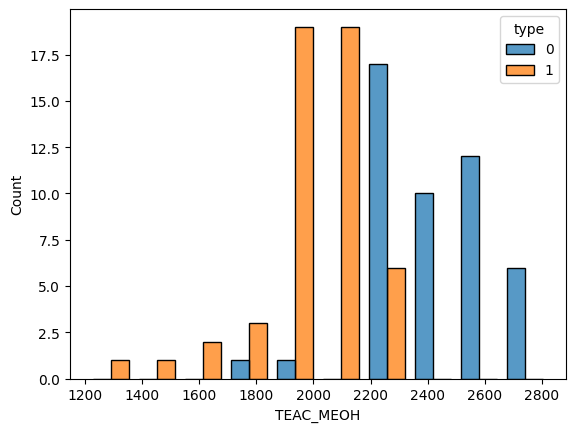

In [28]:
# ___Cell no. 9___
sns.histplot(data=df, x="TEAC_MEOH", hue="type", multiple="dodge", shrink=.8)
show() # shows the plot

The histogram options in the previous code can be explained as follows:

`sns.histplot(data=df, x="TEAC_MEOH", hue="type", multiple="dodge", shrink=.8)`

* `data=df`:  df is the dataframe name
* `x="TEAC_MEOH"`: TEAC_MEOH is the variable value that is histogrammed
* `hue="type"`: This separates the data into two classes according to "type" (0 or 1)
* `multiple = "dodge"`: This offsets the two histograms from each other. An alternative is `multiple = "stack"`. The default is to overlay the histograms.
* shrink = .8:  The histogram bars will occupy 80% of the bin width

**Exercise From the histograms we may draw the following conclusions:

 - nonfermented (blue) has the higher mean and the smaller variance. It is also somewhat less left skewed. The data appears to have two peaks (this is called "bimodal", but with more data it's quite likely that this effect would disappear.
 - fermented (orange) is clearly left skewed.


We can do multiple plots from the same cell if we use the 'show() command between plots. Otherwise all the data will be put on the same plot.

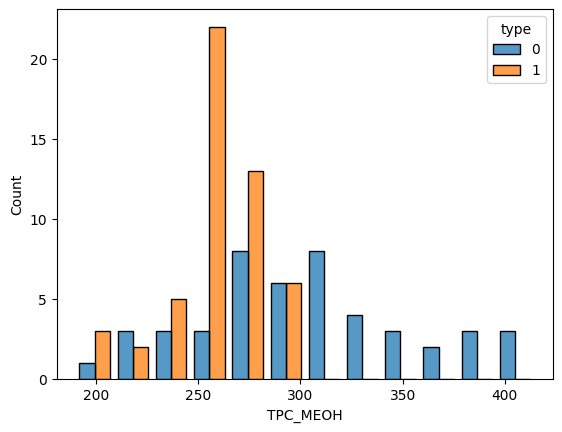

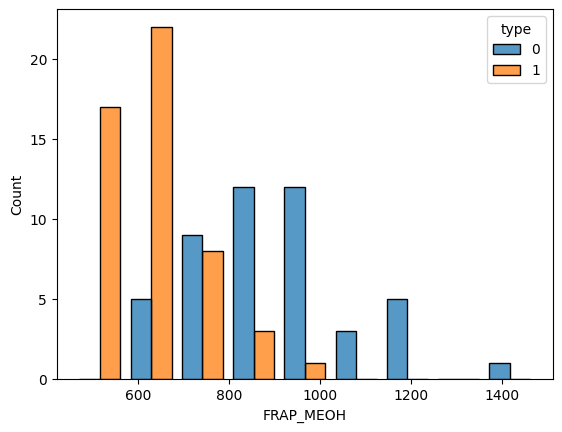

In [29]:
# ___Cell no. 10___
sns.histplot(data=df, x="TPC_MEOH", hue="type", multiple="dodge", shrink=.8)
show()
sns.histplot(data=df, x="FRAP_MEOH", hue="type", multiple="dodge", shrink=.8)
show()

 - fermented (orange) TPC_MEOH has a much smaller variance than nonfermented (blue), and is also slightly skewed left.
 - fermented (orange) FRAP_MEOH also has a smaller variance than nonfermented (blue), but this time is slightly skewed right.

---
**Exercise 4:** Do the plots for TEAC, TPC, and FRAP for water solvent.
<br>
##### **Hint**: Remember to use show() to separate the plots.

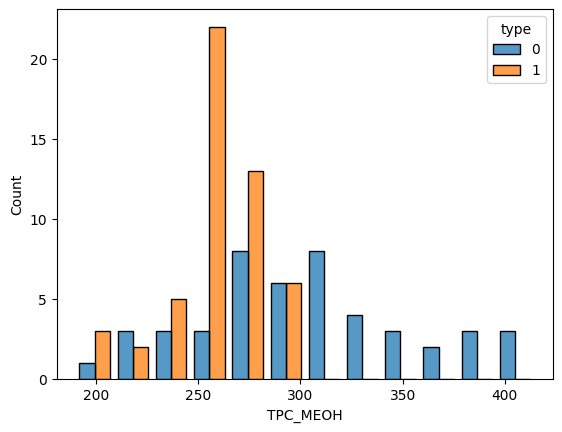

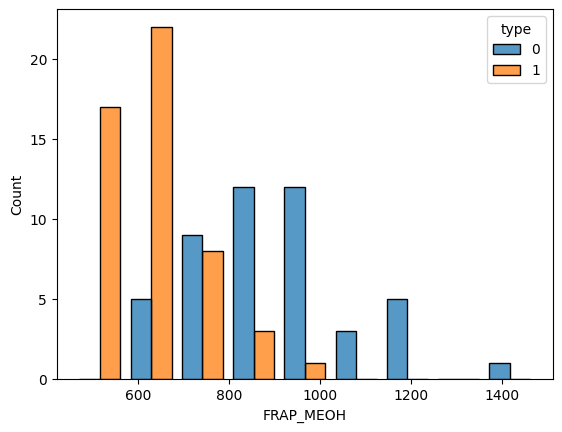

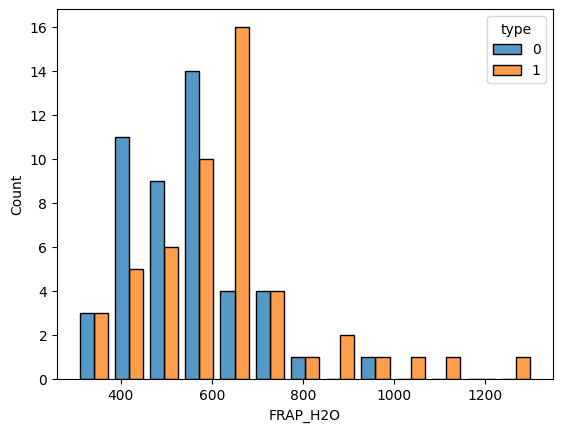

In [30]:

#-------  Your code here (TEAC) -----------
sns.histplot(data=df, x="TPC_MEOH", hue="type", multiple="dodge", shrink=.8)
show()
#-------  Your code here (TPC) -----------
sns.histplot(data=df, x="FRAP_MEOH", hue="type", multiple="dodge", shrink=.8)
show()
#-------  Your code here (FRAP) -----------
sns.histplot(data=df, x="FRAP_H2O", hue="type", multiple="dodge", shrink=.8)
show()

---

<b><i> Saving data for later use </i></b>

We can save the data so that we can call it up again in the next notebook

In [31]:
%store df_nf
%store df_fer
%store df

Stored 'df_nf' (DataFrame)
Stored 'df_fer' (DataFrame)
Stored 'df' (DataFrame)


Congratulations!  You've finished your basic exploration of the data.  In the next notebook we'll go on to more descriptive visualizations.